# TP 2 
## Análisis y Curación

### Ejercicio 1: Tablas de Crecimiento
Tareas:
    
 - Descargar dataset en CSV
   + [Tablas de Peso](https://github.com/DiploDatos/AnalisisYCuracion/blob/master/input/wtageinf.csv) 
   + Basado en [esto](https://www.cdc.gov/growthcharts/percentile_data_files.htm9)
 - Graficar las curvas correspondientes a cada percentil para niños y niñas
   + En la columna Sex, 1 representa a niños y 2 a niñas
   + Las curvas de los percentiles correspondientes a un mismo sexo deben ir en un mismo gráfico.
   + Un gráfico para cada sexo.

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sys
# BASE_DIR = "https://github.com/avdata99/diplo-datos-TPs-materia-2-analisis-y-curacion/"
BASE_DIR = ''

In [22]:
tabla_1 = pd.read_csv(BASE_DIR + "data/wtageinf.csv")
tabla_1.head(5)
# print("SEX: 1 niños; 2 niñas")

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878


In [14]:
tabla_1.dtypes

Sex         int64
Agemos    float64
L         float64
M         float64
S         float64
P3        float64
P5        float64
P10       float64
P25       float64
P50       float64
P75       float64
P90       float64
P95       float64
P97       float64
dtype: object

### Curvas de crecimiento de niños

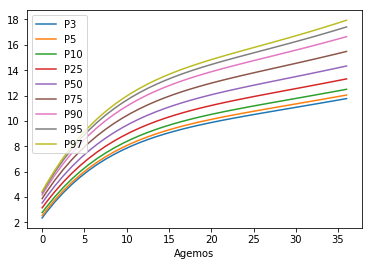

In [16]:
filtrado= tabla_1[tabla_1.Sex==1]
filtrado.plot(x='Agemos', y=[ 'P3', 'P5', 'P10', 'P25', 'P50', 'P75',
       'P90', 'P95', 'P97'])

### Curvas de crecimiento de niñas

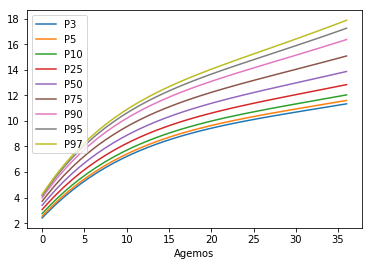

In [17]:
filtrado= tabla_1[tabla_1.Sex==2]
filtrado.plot(x='Agemos', y=[ 'P3', 'P5', 'P10', 'P25', 'P50', 'P75',
       'P90', 'P95', 'P97'])

## Ejercicio 2: Pasos Fronterizos
Tareas
 - Descargar dataset en JSON [Pasos Fronterizos](https://github.com/DiploDatos/AnalisisYCuracion/blob/master/input/pasos.json)
 - Graficar un histograma agrupando por valor del atributo “province”.

In [93]:
tabla2 = pd.read_json(BASE_DIR + "data/pasos.json")
tabla2.head(5)

,location,name,province
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz


In [94]:
print(tabla2['province'].unique())
print('\n - Neuquen está escrito de 2 formas')
print(' - El Aeropuerto no es una provincia')
print(' - Córdoba?')
print(tabla2[ tabla2['province'] == 'Cordoba'])
print(' -- Está dos veces un aeropuerto y algo en Valle Hermoso')

['Tierra del Fuego' 'Santa Cruz'
 'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ' 'Chubut'
 'Rio Negro' 'Neuquen' 'NEUQUEN' 'Buenos Aires' 'Mendoza' 'San Luis'
 'San Juan' 'Santa Fe' 'Córdoba' 'Cordoba' 'Entre Rios' 'La Rioja'
 'Corrientes' 'Catamarca' 'Santiago del Estero' 'Tucuman' 'Chaco'
 'Misiones' 'Formosa' 'Salta' 'Jujuy']

 - Neuquen está escrito de 2 formas
 - El Aeropuerto no es una provincia
 - Córdoba?
                       location                name province
122  [-31.3154367, -64.2145085]        AERO CORDOBA  Cordoba
125  [-31.3154367, -64.2145085]        AERO CORDOBA  Cordoba
126  [-32.3683712, -70.2314398]  PASO VALLE HERMOSO  Cordoba
 -- Está dos veces un aeropuerto y algo en Valle Hermoso


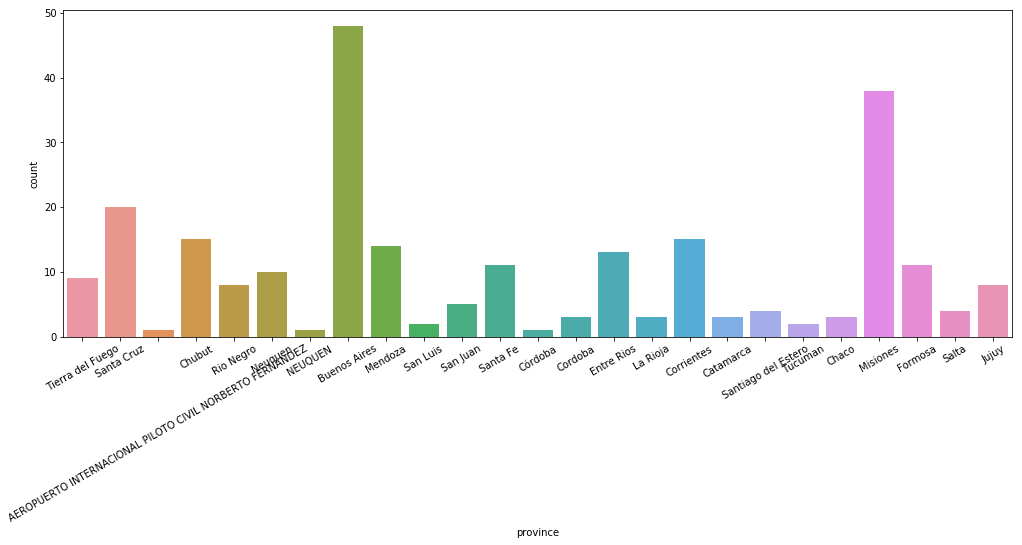

In [95]:
import seaborn
# seaborn.__version__

plt.figure(figsize=(17,6))

seaborn.countplot(data=tabla2, x='province')
# provincias = tabla2['province'].str.upper().unique()
# seaborn.distplot(a=tabla2['province'].value_counts(), label='Pasos fronterizos por provincia')
plt.xticks(rotation=30)
plt.show()

## Ejercicio 3 Despersonalizar datos y guardarlos en un nuevo archivo

In [200]:
pd.options.display.float_format = '{:.2f}'.format
# fails kickstarter_2016 = pd.read_csv(BASE_DIR + "data/kickstarter-projects/ks-projects-201612.csv")
kickstarter_2018 = pd.read_csv(BASE_DIR + "data/ks-projects-201801.csv", parse_dates=["deadline","launched"], index_col=['ID'])
kickstarter_2018.head(3)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00


In [201]:
import numpy as np
np.random.seed(0)
kickstarter_2018.sample(5)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
796196901,10G Christmas Tree,Art,Art,USD,2010-12-26,10526.00,2010-12-08 08:44:04,0.00,failed,0,US,0.00,0.00,10526.00
483825010,Gliff,Gaming Hardware,Games,USD,2016-03-28,10000.00,2016-01-28 04:56:18,51.00,failed,5,US,51.00,51.00,10000.00
123916947,STUFFED Food Truck,Food Trucks,Food,USD,2015-01-06,60000.00,2014-11-07 02:24:36,25.00,failed,1,US,25.00,25.00,60000.00
1565733636,NeoExodus Adventure: Origin of Man for Pathfin...,Tabletop Games,Games,USD,2012-05-01,500.00,2012-03-15 01:16:10,585.00,successful,17,US,585.00,585.00,500.00
1273544891,NAPOLEON IN NEW YORK! an original TV Series,Comedy,Film & Video,USD,2016-07-26,25000.00,2016-05-27 00:07:25,25.00,failed,1,US,25.00,25.00,25000.00


In [202]:
kickstarter_2018.dtypes

name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [203]:
kickstarter_2018.describe(include=['object'])

,name,category,main_category,currency,state,country
count,378657,378661,378661,378661,378661,378661
unique,375764,159,15,14,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,failed,US
freq,41,22314,63585,295365,197719,292627


In [204]:
print(kickstarter_2018['launched'].min())
print(kickstarter_2018['launched'].max() - kickstarter_2018['launched'].min())

1970-01-01 01:00:00
17533 days 14:02:31


In [205]:
kickstarter_2018[kickstarter_2018.duplicated()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,


In [206]:
pd.Series(kickstarter_2018.index,dtype=str).describe()

count         378661
unique        378661
top       1378891576
freq               1
Name: ID, dtype: object

In [207]:
from hashlib import md5
# ERROR kickstarter_2018['name'].apply(md5)
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()
hashed = kickstarter_2018['name'].apply(hashit)
hashed.head(3)

ID
1000002330    a6828ae8a2eca25f0dd7035efc0af0a0
1000003930    81609b3bdc0b96f429672d69702f2524
1000004038    c12f5c3bace2f0213cdb2679a265dca0
Name: name, dtype: object

#### EJERCICIO Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

In [208]:
kickstarter_2018["hash_name"] = kickstarter_2018['name'].apply(hashit)
verificaciones = kickstarter_2018[kickstarter_2018.duplicated("name")]["name"].index == kickstarter_2018[kickstarter_2018.duplicated("hash_name")]["hash_name"].index
print('Verificaciones: {}'.format(len(verificaciones)))
fallas = [verif for verif in verificaciones if verif==False]
print('Fallas: {}'.format(len(fallas)))

Verificaciones: 2896
Fallas: 0


## Grabar anonimizado

In [209]:
kickstarter_2018.to_csv(BASE_DIR + "data/ks-projects-201801-for-pandas.csv")

In [210]:
import chardet
# import string
# string.ascii_letters + string.digits
# Detectar charset

f = open(BASE_DIR + "data/ks-projects-201612.csv", 'rb')
result = chardet.detect(f.read(10000))
f.close()
result

{'confidence': 0.73, 'encoding': 'Windows-1252', 'language': ''}

In [211]:
kickstarter_2016 = pd.read_csv(BASE_DIR + "data/ks-projects-201612.csv", encoding='Windows-1252')
# , parse_dates=["deadline","launched"], index_col=['ID']
kickstarter_2016.head(3)

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,nan
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,nan
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,nan


In [212]:
import ftfy.badness as bad
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)


kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
weirs = kickstarter_2018[kickstarter_2018['name_weirdness'] > 1]
weirs.head(3)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,hash_name,name_weirdness
ID,,,,,,,,,,,,,,,,
1221990593,Support PMCD´s ¨From a Different Clay¨,Dance,Dance,USD,2011-06-08,1500.00,2011-04-28 05:15:32,1940.00,successful,27,US,1940.00,1940.00,1500.00,19f1788f626264c587f12538f8139bbc,3
1234089244,Cracking (Mastering) the Metaphor (Political)...,Nonfiction,Publishing,USD,2013-10-27,30000.00,2013-09-27 23:33:29,0.00,failed,0,US,0.00,0.00,30000.00,30b4c57210c341dddf4feb98b6b613a4,2
124795481,µGALE (Canceled),Wearables,Technology,EUR,2015-04-17,18000.00,2015-02-16 01:55:34,10.00,canceled,2,NL,11.39,10.81,19465.14,02cf1ec15a3b1bbbe9c2233772317ed0,2


In [213]:
columnas_de_nombres_raros = kickstarter_2018.columns[~kickstarter_2018.columns.str.match(r'^(\w+)$')]
print(columnas_de_nombres_raros)
# "" arreglar ""
kickstarter_2018.columns = kickstarter_2018.columns.str.replace(' ', '_')
kickstarter_2018.head()

Index(['usd pledged'], dtype='object')


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,hash_name,name_weirdness
ID,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,81609b3bdc0b96f429672d69702f2524,0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,c12f5c3bace2f0213cdb2679a265dca0,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,9c01404a2ef702811c2088ce139042ad,0


#### Ejercicio Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [214]:
#conteo de cantidad de nombres raros en kickstarter_2018
kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
raros1 = len(kickstarter_2018[kickstarter_2018['name_weirdness'] > 1])
#conteo de cantidad de nombres raros en kickstarter_2018 importado con encoding iso-8859-1
kickstarter_2018_iso_8859_1 = pd.read_csv(BASE_DIR + "data/ks-projects-201801.csv", encoding="ISO-8859–1")
kickstarter_2018_iso_8859_1['name_weirdness'] = kickstarter_2018_iso_8859_1['name'].apply(weird)
raros2 = len(kickstarter_2018_iso_8859_1[kickstarter_2018_iso_8859_1['name_weirdness'] > 1])

print(raros1, raros2)

26 7682


### Valores faltantes

In [215]:
# get the number of missing data points per column
missing_values_count = kickstarter_2018.isnull().sum()

# look at the # of missing points
missing_values_count[missing_values_count > 0]

name              4
usd_pledged    3797
dtype: int64

In [216]:
porc_nombes_nulos = len(kickstarter_2018.dropna(subset=['name']))/len(kickstarter_2018)
print(porc_nombes_nulos)
# Ver cuales son
print(kickstarter_2018[['main_category', 'category', 'name']][kickstarter_2018.name.isnull()])

0.9999894364616372
           main_category        category name
ID                                           
1848699072  Film & Video  Narrative Film  NaN
634871725          Games     Video Games  NaN
648853978         Design  Product Design  NaN
796533179            Art        Painting  NaN


## Codificar variables
Para trabajar con los algoritmos de aprendizaje automático, las variables categóricas estas deben ser codificadas como variables numéricas, no como cadenas.
Para esta tarea también hay diferentes estrategias, dos comunes son: asociar cadena a número y asociar cadena a columna.

In [217]:
kickstarter_2018.describe(include=['O'])

,name,category,main_category,currency,state,country,hash_name
count,378657,378661,378661,378661,378661,378661,378661
unique,375764,159,15,14,6,23,375765
top,New EP/Music Development,Product Design,Film & Video,USD,failed,US,2cdff1887ad0f0d341ca3f08841de3a0
freq,41,22314,63585,295365,197719,292627,41


In [218]:
from sklearn import preprocessing
column='main_category'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])
nuevas_categorias = dict(zip(le.classes_,le.transform(le.classes_)))
print('Nuevas categorias como numeros: {}'.format(nuevas_categorias))
kickstarter_2018['main_category_num'] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head(3)

Nuevas categorias como numeros: {'Art': 0, 'Comics': 1, 'Crafts': 2, 'Dance': 3, 'Design': 4, 'Fashion': 5, 'Film & Video': 6, 'Food': 7, 'Games': 8, 'Journalism': 9, 'Music': 10, 'Photography': 11, 'Publishing': 12, 'Technology': 13, 'Theater': 14}


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,hash_name,name_weirdness,main_category_num
ID,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0,0,12
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,81609b3bdc0b96f429672d69702f2524,0,6
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,c12f5c3bace2f0213cdb2679a265dca0,0,6


In [219]:
from sklearn.preprocessing import LabelBinarizer
other_column = 'state'

lb = LabelBinarizer()

lb_results = lb.fit_transform(kickstarter_2018[other_column])
pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_))).head(10)

,state_canceled,state_failed,state_live,state_successful,state_suspended,state_undefined
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,1,0,0,0,0
8,1,0,0,0,0,0
9,1,0,0,0,0,0


#### Ejercicio Codificar currency con ambas estrategias

In [223]:
column = "currency"
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])
valores = dict(zip(le.classes_,le.transform(le.classes_)))
print('Monedas: {}'.format(valores))
kickstarter_2018['currency_num'] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head(3)

Monedas: {'AUD': 0, 'CAD': 1, 'CHF': 2, 'DKK': 3, 'EUR': 4, 'GBP': 5, 'HKD': 6, 'JPY': 7, 'MXN': 8, 'NOK': 9, 'NZD': 10, 'SEK': 11, 'SGD': 12, 'USD': 13}


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,hash_name,name_weirdness,main_category_num,currency_num
ID,,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0,0,12,5
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,81609b3bdc0b96f429672d69702f2524,0,6,13
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,c12f5c3bace2f0213cdb2679a265dca0,0,6,13
